<h1><center>Practice of Large Scale Machine Learning<center></h1>
<h1><center>TP4.1 MNIST classification using a FCN<center></h1>
<h2><center>ATHENS 2018<center></h2>
Email address for sending back the TPs: attilio.fiandrotti@telecom-paristech.fr

In [2]:
# As a first step, we may want to switch to a GPU-acceperated VM
# In the menu: Runtime->Change runtime type->Hardware Accelerator->GPU.
#
# This will thest if we have a GPU-equipped VM and return some useful system-level information
!nvidia-smi

# Which GNU/Linux distribution is installed on our VM ?
!lsb_release -a

# Which version of the Linux kernel our VM has ?
!uname -a

# How much free memory our VM has ?
!free -h

# Which storage facilities our VM has ?
#mount

# Which python version our VM has installed ?
!python --version

Fri Nov 23 09:16:16 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Installing and importing Keras

In [0]:
# This shell command will install the keras package into our VM (if not already installed)
# Mind the "!" escape character at the beginning of the line
!pip install -q keras

In [3]:
# Importing the Keras main module: different backends will have different data ordering:
# theano backend: NCHW
# tensorflow backend: NHWC 
import keras

Using TensorFlow backend.


# Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets
Verify the amount of system memory available before and after loading the dataset.

In [4]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
# START CODE HERE
!free -h
(x_train,y_train),(x_test,y_test)=mnist.load_data()
!free -h
# END CODE HERE


              total        used        free      shared  buff/cache   available
Mem:            12G        476M         10G        844K        1.9G         12G
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:            12G        530M         10G        844K        1.9G         11G
Swap:            0B          0B          0B


Using the pyplot package, visualize the fist sample of the trainig set

Text(0.5,1,'Class 5')

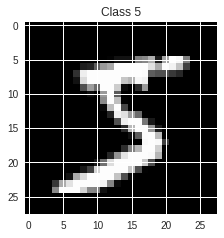

In [5]:
# Let us visualize the first training sample using the Gnuplot library
from matplotlib import pyplot as plt
# START CODE HERE
plt.figure(figsize=(12,12))

plt.subplot(3,3,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Class {}".format(y_train[0]))
# END CODE HERE

Turn train and test labels to one-hot encoding

In [0]:
from keras.utils.np_utils import to_categorical
# START CODE HERE
y_trainoh=to_categorical(y_train,10)
y_testoh= to_categorical(y_test,10)
# END CODE HERE

Reshape train and test images so that they follow the Tensoflow NWHC ordering.
Then, normalize the images so that they have zero-mean (approximate solutions are ok)

In [0]:
x_trl=x_train.shape[0]
x_tsl=x_test.shape[0]

In [0]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = 28, 28
#train_images = train_images.reshape(...)
# START CODE HERE
x_train=x_train.reshape(x_trl,img_rows,img_cols,1)
x_test =x_test.reshape(x_tsl,img_rows,img_cols,1)
# END CODE HERE

# Now let us normalize the image in the [0-1] range paying attention to use floats rather than uint8
#train_images = train_images.astype('float32')
# START CODE HERE
x_train=x_train.astype('float32')
x_test= x_test.astype('float32')

x_train/=255
x_test/=255

# END CODE HERE

# Defining the neural network architecture (i.e., the network model)

In [0]:
x_train_l=x_train.reshape(x_trl,img_rows*img_cols)
x_test_l =x_test.reshape(x_tsl,img_rows*img_cols)

Create a LeNet300-like FC network taking in input the images as vectors of pixels and suitable to classify each image across 10 different classes.

In [10]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
# START CODE HERE
keras.backend.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
# END CODE HERE
# Let us have a look at the model topology
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Instantiate a SGD optimizer with a tentative LR of 10^-3 and using the appropriate loss function and compile the model

In [0]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to teh computed error gradints
from keras import optimizers

# START CODE HERE
sgd=optimizers.SGD(lr=1e-3)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
# END CODE HERE

# Training the network

Train the model for 10 epochs and over 10k training samples initially only using the fit() method, validating the model at each epoch and keeping track of the training history

In [15]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10
# We restrict the training to 10k images to start with
n_train_samples = 10000
# START CODE HERE
history=model.fit(x_train,y_trainoh,epochs=10,batch_size=32,verbose=1,validation_data=(x_test,y_testoh))
# END CODE HERE

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 179us/step - loss: 1.7535 - acc: 0.5194 - val_loss: 1.1954 - val_acc: 0.7590
Epoch 2/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.9152 - acc: 0.8055 - val_loss: 0.6806 - val_acc: 0.8497
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.6108 - acc: 0.8545 - val_loss: 0.5117 - val_acc: 0.8785
Epoch 4/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.4926 - acc: 0.8744 - val_loss: 0.4347 - val_acc: 0.8891
Epoch 5/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.4310 - acc: 0.8854 - val_loss: 0.3889 - val_acc: 0.8963
Epoch 6/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.3927 - acc: 0.8934 - val_loss: 0.3597 - val_acc: 0.9011
Epoch 7/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.3664 - acc: 0.8988 - val_loss: 0.

# Visualizing the network performance
Visualize the training history using the pyplot package: plot in one graph the train and vaidation loss functions, in another graph the train and validation accuracy

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


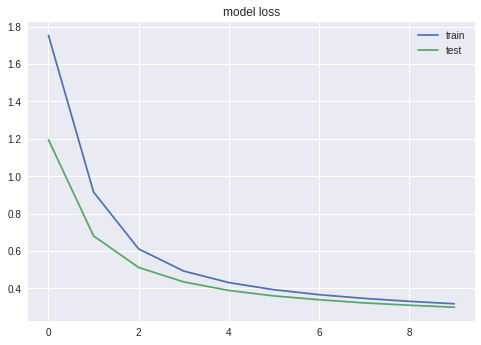

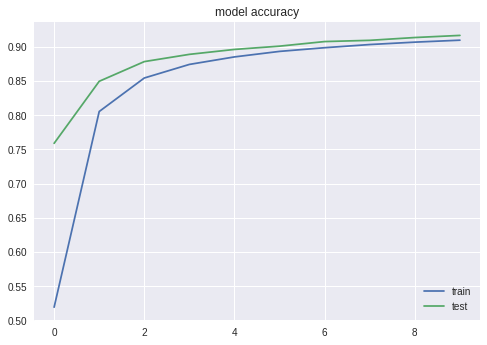

In [25]:
# We now want to plot the train and validation loss functions and accuracy curves

print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train','test'],loc='upper right')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.legend(['train','test'],loc='lower right')
# END CODE HERE
plt.show()


# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference.
Then,  experiment as follow and compare performance with the reference scenario:

*  What is teh coputational complexity of the first fully connected layer ?
*  How to decide when to stop a training session ?
*  Experiment gradually increasing the number of training samples from 10'000 to 50'000 and compare performance with reference. Also, observe how training and validation curves change.
*  Experiment gradually increasing the learning rate starting from 10^-4 and find the maximum value the network can tolerate without diverging.
*   Experiment replacing the sigmoid activations with Relus and note what happens.
*   Experiment changing the batch size (inlcuding purely stochastic case) and compare performance with reference.
*   Experiment shuffling the samples at each batch and compare performance with reference.




